<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Multivariate_Time_Series_Modelling_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import Image, display 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from datetime import datetime
import seaborn as sns   

In [3]:
from google.colab import files
uploaded = files.upload()

Saving energydata_complete.csv to energydata_complete.csv


In [4]:
df1 = pd.read_csv('energydata_complete.csv')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
df1.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
df1.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
df1.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [9]:
df1['date'] = pd.to_datetime(df1['date'], infer_datetime_format=True)

In [10]:
df1['date'].dtypes

dtype('<M8[ns]')

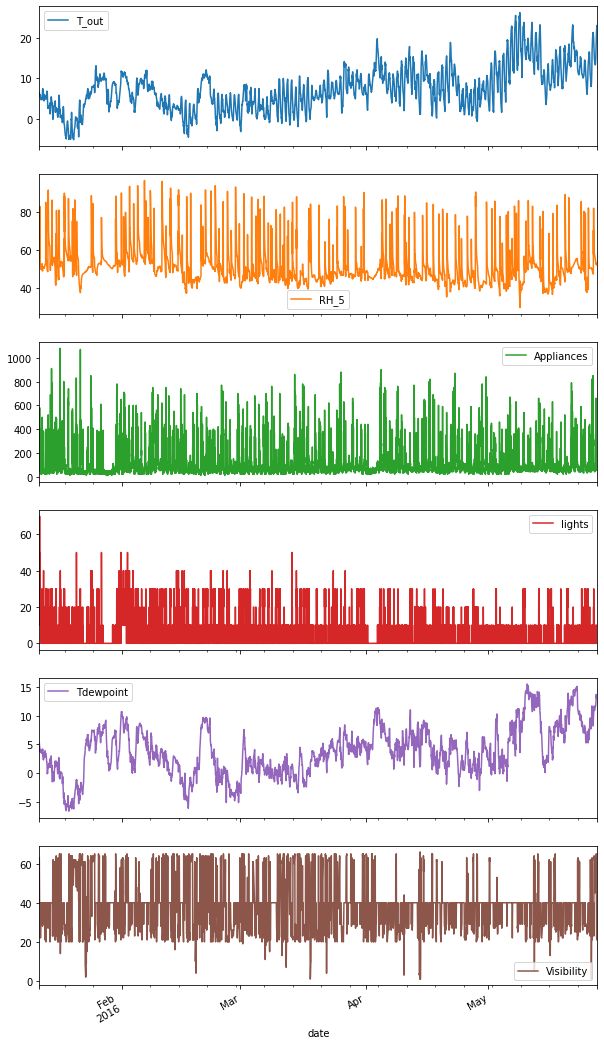

In [11]:
df1.set_index('date')[['T_out','RH_5','Appliances','lights','Tdewpoint','Visibility']].plot(subplots=True,figsize=(10,20));

In [12]:
df2 = df1[['Appliances','RH_5','T_out','Tdewpoint','Visibility']]

In [13]:
df2.head()

,Appliances,RH_5,T_out,Tdewpoint,Visibility
0,60,55.20,6.600000,5.3,63.000000
1,60,55.20,6.483333,5.2,59.166667
2,50,55.09,6.366667,5.1,55.333333
3,50,55.09,6.250000,5.0,51.500000
4,60,55.09,6.133333,4.9,47.666667


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Appliances  19735 non-null  int64  
 1   RH_5        19735 non-null  float64
 2   T_out       19735 non-null  float64
 3   Tdewpoint   19735 non-null  float64
 4   Visibility  19735 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 771.0 KB


In [15]:
df2.describe()

,Appliances,RH_5,T_out,Tdewpoint,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,50.949283,7.411665,3.760707,38.330834
std,102.524891,9.022034,5.317409,4.194648,11.794719
min,10.000000,29.815000,-5.000000,-6.600000,1.000000
25%,50.000000,45.400000,3.666667,0.900000,29.000000
50%,60.000000,49.090000,6.916667,3.433333,40.000000
75%,100.000000,53.663333,10.408333,6.566667,40.000000
max,1080.000000,96.321667,26.100000,15.500000,66.000000


In [16]:
df2.query('Appliances > 500').count()

Appliances    288
RH_5          288
T_out         288
Tdewpoint     288
Visibility    288
dtype: int64

In [17]:
df2.query('Appliances > 500').head()

,Appliances,RH_5,T_out,Tdewpoint,Visibility
11,580,55.000000,5.983333,4.616667,40.000000
314,520,84.123333,2.900000,1.233333,36.333333
392,550,51.196667,2.033333,1.233333,40.000000
393,690,51.863333,2.100000,1.250000,40.000000
394,620,52.400000,2.166667,1.266667,40.000000


In [18]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df2)

In [19]:
scaled_data

array([[0.04672897, 0.38169106, 0.37299035, 0.53846154, 0.95384615],
       [0.04672897, 0.38169106, 0.36923901, 0.53393665, 0.89487179],
       [0.03738318, 0.38003709, 0.36548767, 0.52941176, 0.83589744],
       ...,
       [0.24299065, 0.3375852 , 0.88317256, 0.89894419, 0.37435897],
       [0.38317757, 0.3365828 , 0.87888532, 0.8974359 , 0.38717949],
       [0.39252336, 0.3365828 , 0.87459807, 0.8959276 , 0.4       ]])

In [20]:
features = scaled_data
target = scaled_data[:,0]

In [21]:
#taken two periods of data and predicts the third one
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.04672897, 0.38169106, 0.37299035, 0.53846154, 0.95384615],
         [0.04672897, 0.38169106, 0.36923901, 0.53393665, 0.89487179]]]),
 array([0.03738318]))

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=43, shuffle=False)

#as it is a time series data shuffle= False and the order is very important and we should make sure that we are not shuffling the order

In [23]:
X_train.shape

(14801, 5)

In [24]:
X_test.shape

(4934, 5)

In [25]:
window_length = 720
# 144 per day as its ten mins data and 144*5 gives us 720
batch_size = 32
#each training instance batch size of 32
number_features = 5
train_generator = TimeseriesGenerator(X_train, y_train, length=window_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test, y_test, length=window_length, sampling_rate=1, batch_size=batch_size)

In [26]:
train_generator[0]

(array([[[0.04672897, 0.38169106, 0.37299035, 0.53846154, 0.95384615],
         [0.04672897, 0.38169106, 0.36923901, 0.53393665, 0.89487179],
         [0.03738318, 0.38003709, 0.36548767, 0.52941176, 0.83589744],
         ...,
         [0.06542056, 0.3711658 , 0.25241158, 0.2760181 , 0.79230769],
         [0.05607477, 0.36565257, 0.23901393, 0.28054299, 0.72820513],
         [0.06542056, 0.3615427 , 0.22561629, 0.28506787, 0.66410256]],
 
        [[0.04672897, 0.38169106, 0.36923901, 0.53393665, 0.89487179],
         [0.03738318, 0.38003709, 0.36548767, 0.52941176, 0.83589744],
         [0.03738318, 0.38003709, 0.36173633, 0.52488688, 0.77692308],
         ...,
         [0.05607477, 0.36565257, 0.23901393, 0.28054299, 0.72820513],
         [0.06542056, 0.3615427 , 0.22561629, 0.28506787, 0.66410256],
         [0.06542056, 0.35653067, 0.21221865, 0.28959276, 0.6       ]],
 
        [[0.03738318, 0.38003709, 0.36548767, 0.52941176, 0.83589744],
         [0.03738318, 0.38003709, 0.3617363

In [27]:
import tensorflow as tf


model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (window_length, number_features), return_sequences= True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences= True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(128, return_sequences= True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences= False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 720, 128)          68608     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 720, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 720, 128)          131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 720, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 720, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 720, 128)          131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 720, 128)          0

In [29]:
early_stopping  = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')

In [30]:
model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])

In [31]:
history= model.fit_generator(train_generator, epochs=10, validation_data=test_generator, shuffle=False, callbacks=early_stopping)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
441/441 [==============================] - 54s 122ms/step - loss: 0.0093 - mean_absolute_error: 0.0551 - val_loss: 0.0084 - val_mean_absolute_error: 0.0735
Epoch 2/10
441/441 [==============================] - 53s 120ms/step - loss: 0.0082 - mean_absolute_error: 0.0504 - val_loss: 0.0066 - val_mean_absolute_error: 0.0578
Epoch 3/10
441/441 [==============================] - 53s 120ms/step - loss: 0.0067 - mean_absolute_error: 0.0439 - val_loss: 0.0048 - val_mean_absolute_error: 0.0489
Epoch 4/10
441/441 [==============================] - 53s 119ms/step - loss: 0.0047 - mean_absolute_error: 0.0347 - val_loss: 0.0039 - val_mean_absolute_error: 0.0428
Epoch 5/10
441/441 [==============================] - 53s 121ms/step - loss: 0.0044 - mean_absolute_error: 0.0334 - val_loss: 0.0035 - val_mean_absolute_error: 0.0384
Epoch 6/10
441/441 [==============================] - 53s 120ms/step - loss: 0.0043 - mea

In [32]:
model.evaluate_generator(test_generator, verbose=0)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.003434607293456793, 0.03669293597340584]

In [34]:
predict =  model.predict(test_generator)

In [35]:
#X_test - window_length = 720 difference that is the time step
predict.shape

(4214, 1)

In [36]:
predict

array([[0.06451672],
       [0.0600765 ],
       [0.07104556],
       ...,
       [0.10507249],
       [0.27604315],
       [0.28270096]], dtype=float32)

In [37]:
df_predicted = pd.concat([pd.DataFrame(predict), pd.DataFrame(X_test[:,1:][window_length:])],axis=1)

In [38]:
df_predicted

,0,0,1,2,3
0,0.064517,0.217196,0.403805,0.370287,0.600000
1,0.060076,0.215191,0.408360,0.366516,0.600000
2,0.071046,0.214189,0.393355,0.361991,0.600000
3,0.058672,0.212284,0.378349,0.357466,0.600000
4,0.044388,0.211232,0.363344,0.352941,0.600000
5,0.047376,0.208124,0.348339,0.348416,0.600000
6,0.054003,0.205769,0.333333,0.343891,0.600000
7,0.042663,0.204766,0.318328,0.339367,0.600000
8,0.070856,0.204265,0.328242,0.349170,0.600000
9,0.052409,0.203163,0.338156,0.358974,0.600000


In [39]:
reverse_transformation = scaler.inverse_transform(df_predicted)

In [40]:
reverse_transformation

array([[ 79.0328858 ,  44.26      ,   7.55833333,   1.58333333,
         40.        ],
       [ 74.28185232,  44.12666667,   7.7       ,   1.5       ,
         40.        ],
       [ 86.01875201,  44.06      ,   7.23333333,   1.4       ,
         40.        ],
       ...,
       [122.42756523,  52.26666667,  22.46666667,  13.26666667,
         25.33333333],
       [305.36616713,  52.2       ,  22.33333333,  13.23333333,
         26.16666667],
       [312.49002278,  52.2       ,  22.2       ,  13.2       ,
         27.        ]])

In [41]:
df3 = df2[predict.shape[0]*-1:]

In [42]:
df3.count()

Appliances    4214
RH_5          4214
T_out         4214
Tdewpoint     4214
Visibility    4214
dtype: int64

In [43]:
df3['Appliance_Predicted'] = reverse_transformation[:,0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
df3

,Appliances,RH_5,T_out,Tdewpoint,Visibility,Appliance_Predicted
15521,50,44.260000,7.558333,1.583333e+00,40.000000,79.032886
15522,60,44.126667,7.700000,1.500000e+00,40.000000,74.281852
15523,50,44.060000,7.233333,1.400000e+00,40.000000,86.018752
15524,30,43.933333,6.766667,1.300000e+00,40.000000,72.778777
15525,30,43.863333,6.300000,1.200000e+00,40.000000,57.494909
15526,40,43.656667,5.833333,1.100000e+00,40.000000,60.691913
15527,30,43.500000,5.366667,1.000000e+00,40.000000,67.783170
15528,60,43.433333,4.900000,9.000000e-01,40.000000,55.649259
15529,50,43.400000,5.208333,1.116667e+00,40.000000,85.815981
15530,50,43.326667,5.516667,1.333333e+00,40.000000,66.077982


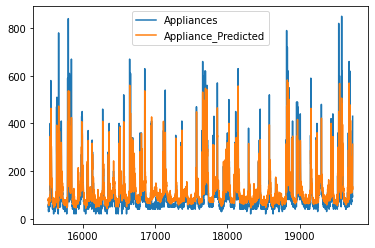

In [45]:
df3[['Appliances','Appliance_Predicted']].plot()